### **<span style="color:green">VISÃO GERAL DA BASE DE DADOS: Titanic</span>**

Esta base de dados contém informações sobre os passageiros do Titanic, o famoso navio que afundou em 1912. Ela é amplamente utilizada para análises de sobrevivência e para entender os fatores que influenciaram a sobrevivência dos passageiros. Aqui estão algumas das variáveis incluídas:

- **PassengerId**: Identificador único de cada passageiro.
- **Survived**: Indica se o passageiro sobreviveu (1) ou não (0).
- **Pclass**: Classe do bilhete do passageiro (1ª, 2ª, 3ª).
- **Name**: Nome do passageiro.
- **Sex**: Sexo do passageiro.
- **Age**: Idade do passageiro.
- **SibSp**: Número de irmãos/cônjuges a bordo do Titanic.
- **Parch**: Número de pais/filhos a bordo do Titanic.
- **Ticket**: Número do bilhete.
- **Fare**: Tarifa paga pelo bilhete.
- **Cabin**: Número da cabine.
- **Embarked**: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton).

A meta é entender como diferentes características dos passageiros e suas condições de viagem podem influenciar a probabilidade de sobrevivência no naufrágio do Titanic. Essa base de dados pode ser usada para diversas análises, como identificar padrões de sobrevivência, visualizar tendências demográficas dos passageiros e realizar previsões sobre fatores que afetaram as chances de sobrevivência.

Link para a competição do Kaggle: https://www.kaggle.com/competitions/titanic/overview

---

### **<span style="color:green">IMPORTS E CONFIGURAÇÕES</span>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, auc
import matplotlib.pyplot as plt

#!pip install ipywidgets

### **<span style="color:green">FUNÇÕES DE PROCESSAMENTO DE DADOS</span>**

In [2]:
CAMINHO_BASE_TREINAMENTO = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/titanic/train.csv'
CAMINHO_BASE_TESTE = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/titanic/test.csv'

In [3]:
def carregar_dados(path: str):
  dados = pd.read_csv(path)
  return dados

In [4]:
def obter_treino_e_teste(df: pd.DataFrame, perc_treino: float = 0.8):
    treino, teste = train_test_split(df, train_size=perc_treino ,random_state=42)
    return treino, teste  

In [5]:
def transformar_sex_em_inteiro(df: pd.DataFrame):
    df.Sex = df.Sex.map({'male': 0, 'female': 1})
    return df

In [6]:
def adicionar_indicador_menor_idade(df: pd.DataFrame):
    df['isChild'] = df.Age.map(lambda age: 1 if age < 0 else 0)
    return df

In [7]:
def calcular_roc_auc(y_true, y_pred):
    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    
    # Calcular a área sob a curva (AUC)
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [8]:
def exibir_metricas_desempenho(ypred, ytrue):
    acuracia = accuracy_score(y_pred=ypred, y_true=ytrue)
    precisao = precision_score(y_pred=ypred, y_true=ytrue)
    revocacao = recall_score(y_pred=ypred, y_true=ytrue)
    roc_auc = calcular_roc_auc(y_pred=ypred, y_true=ytrue)

    print(f'Acurácia: {round(acuracia, 5)}')
    print(f'Precisão: {round(precisao, 5)}')
    print(f'Revocação: {round(revocacao, 5)}')
    print(f'ROC-AUC: {round(roc_auc, 5)}')

In [9]:
def plot_roc_auc(ytrue, ypred):
    # Gerar curva de precisão-revocação
    precision, recall, _ = precision_recall_curve(ytrue, ypred)

    plt.figure(figsize=(14, 7))

    # Subplot para a curva de precisão-revocação
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    # Subplot para a curva ROC
    fpr, tpr, _ = roc_curve(ytrue, ypred)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, marker='.', label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Mostrar os gráficos
    plt.show()

### **<span style="color:green">OBTENHA E PROCESSE OS DADOS</span>**

In [33]:
df = carregar_dados(path=CAMINHO_BASE_TREINAMENTO)
df = adicionar_indicador_menor_idade(df)
df = transformar_sex_em_inteiro(df)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0


### **<span style="color:green">TRATE OS ATRIBUTOS NULOS</span>**

**Principais tecnicas de imputação de valores nulos**

1. **Imputação por Média/Média Ponderada**: Substitui valores ausentes pela média dos valores existentes. A média ponderada leva em consideração a frequência dos valores.

2. **Imputação por Média de Grupo**: Usa a média dos valores de um grupo específico ao qual a observação pertence.

3. **Imputação por K-Vizinhos Mais Próximos (KNN)**: Substitui valores ausentes com base nos valores dos k vizinhos mais próximos.

4. **Imputação por Regressão**: Usa modelos de regressão para prever os valores ausentes com base nas outras variáveis.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  isChild      891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


**Preencha os valores vazios da coluna Age com a média do grupo Sexo e Pclass.** <br /><br />
Como fazer a imputação por média de grupo?

- Preenchendo os valores ausentes em 'Age' com as médias calculadas para cada grupo correspondente

     ```df['Age'].fillna(...)```

- Agrupando o DataFrame pelas colunas 'Sex' e 'Pclass'

    ```groupby(['Sex', 'Pclass'])```: 

- Calculando a média de 'Age' para cada grupo.

     ```['Age'].transform('mean')```

In [36]:
df['Age'] = df['Age'].fillna(df.groupby(by=['Sex', 'Pclass'])['Age'].transform('mean'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  isChild      891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


Preencha os valores do campo Embarked com os valores mais frequentes. <br /> <br />

- Encontrando o valor mais frequente na coluna 'Embarked'

    ```df['Embarked'].mode()[0]```

- preencheenchendo os valores ausentes com o valor mais frequente.

    ```fillna(df['Nome'].mode()[0])```

In [38]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  isChild      891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


### **<span style="color:green">TRANSFORME ATRIBUTOS CATEGÓRICOS EM NUMÉRICOS</span>**

Existem diversas técnicas de transformação de atributos categóricos em numéricos. As mais famosas são **Label Encoder** e **One Hot Encoder**. Enquanto a primeira funciona bem para problemas **"Convencionais/tabulares"**, a segunda técnica funciona bem para **redes neurais**. Para o nosso problema, utilizaremos Label Encoder. <br /> 

1. Cria uma instância do LabelEncoder.
2. Ajusta o LabelEncoder aos dados da coluna 'Embarked' e transforma esses dados em valores numéricos. 
3. Utilize a função ```value_counts()``` do pandas para visualizar a quantidade de embarques distintos.

In [40]:
from sklearn.preprocessing import LabelEncoder

df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df.Embarked.value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

### **<span id="id_secao_prevendo_sobreviventes" style="color:green">PREVEJA OS SOBREVIVENTES COM DECISION TREE E RANDOM FOREST</span>**

Reutilize o método `obter_treino_e_teste()` para dividir o dataframe em treino e teste.

In [41]:
treino, teste = obter_treino_e_teste(df)

Crie o X e y de treino e teste conforme apresentado nos últimos notebooks. Utilize apenas as colunas <span style="color:red">'Pclass', 'Fare', 'SibSp', 'Parch', 'Sex', 'isChild', 'Embarked', 'Age'</span>. 

In [42]:
cols_to_predict = ['Pclass', 'Fare', 'SibSp', 'Parch', 'Sex', 'isChild', 'Embarked', 'Age']

In [43]:
x_treino = treino[cols_to_predict]
y_treino = treino['Survived']

x_teste = teste[cols_to_predict]
y_teste = teste['Survived']

##### **Treine o modelo DecisionTreeClassifier faça precisões**

In [44]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X=x_treino, y=y_treino)

ypred_dt = clf.predict(X=x_teste)

Reutilize o método `exibir_metricas_desempenho()` para apresentar dados de performance do modelo decision tree.

In [45]:
exibir_metricas_desempenho(ypred=ypred_dt, ytrue=y_teste)

Acurácia: 0.78212
Precisão: 0.72727
Revocação: 0.75676
ROC-AUC: 0.77838


Reutilize o método `plot_roc_auc()` para visualizar e avaliar o desempenho do modelo.

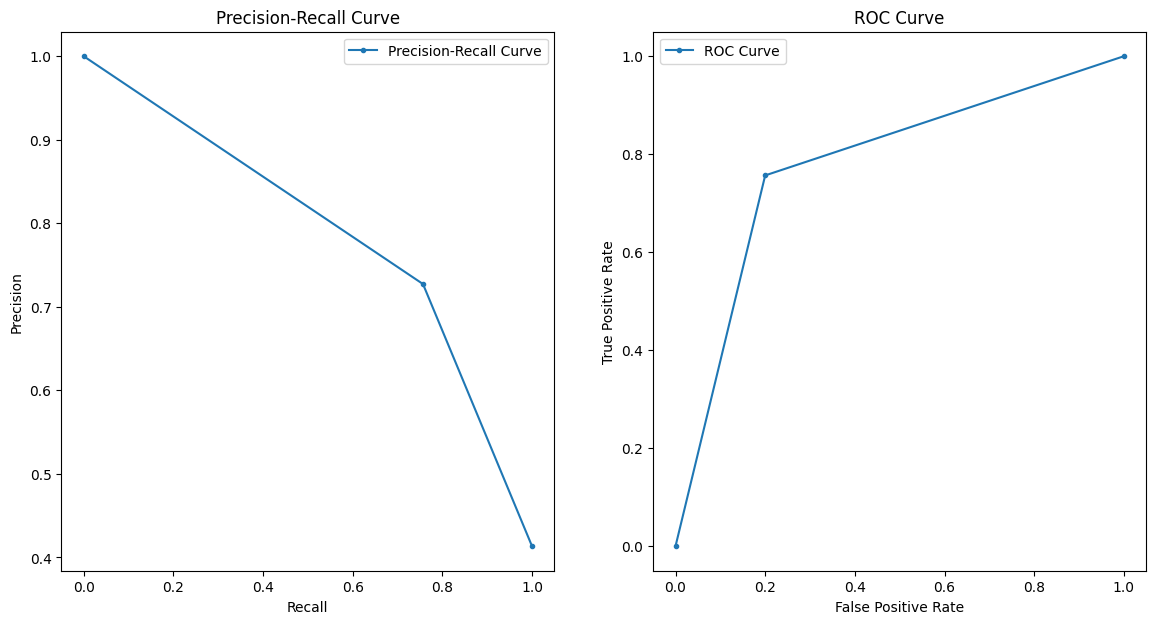

In [46]:
plot_roc_auc(ytrue=y_teste, ypred=ypred_dt)

#### **Treine o modelo RandomForestClassifier, faça previsões e armazeneas numa variável chamada ypred_rf.**

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X=x_treino, y=y_treino)

ypred_rf = clf.predict(X=x_teste)

Reutilize o método `exibir_metricas_desempenho()` para avaliar a performance da Floresta Aleatória (RandomForest)

In [50]:
exibir_metricas_desempenho(ypred=ypred_rf, ytrue=y_teste)

Acurácia: 0.82123
Precisão: 0.79167
Revocação: 0.77027
ROC-AUC: 0.81371


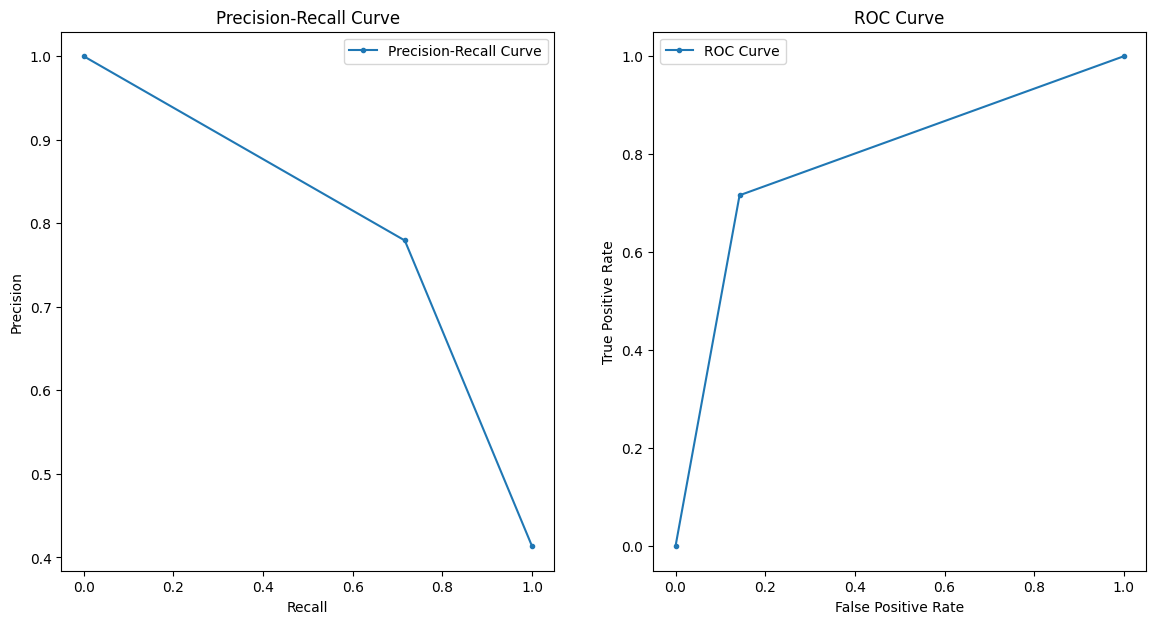

In [19]:
plot_roc_auc(ypred=ypred_rf, ytrue=y_teste)

### **<span style="color:green">AVALIE A QUALIDADE DOS ATRIBUTOS COM MUTUAL INFORMATION E FEATURE IMPORTANCES</span>**

#### **Informação Mútua (Mutual Information)**

A informação mútua é uma medida da dependência entre duas variáveis aleatórias. Em termos simples, ela quantifica a quantidade de informação que uma variável contém sobre a outra. É usada em várias áreas, como teoria da informação, aprendizado de máquina e estatística.

- **Captura de Dependências Não-Lineares**: Ao contrário da correlação, a informação mútua pode capturar dependências não-lineares entre variáveis.
- **Simplicidade Conceitual**: É uma medida intuitiva que quantifica a redução da incerteza sobre uma variável ao conhecer outra.

In [51]:
from sklearn.feature_selection import mutual_info_classif

def calcular_mi_scores(df):
    X = df[cols_to_predict]
    y = df['Survived']
    
    # Calcular as pontuações de informação mútua
    mi_scores = mutual_info_classif(X, y)
    
    # Criar um dataframe com as pontuações
    mi_scores_df = pd.DataFrame(
        {
            'Atributo': X.columns,
            'MI Score': mi_scores
        }
    ).sort_values(by='MI Score', ascending=False)
    
    return mi_scores_df


mi_scores_df = calcular_mi_scores(df)
print(mi_scores_df)

   Atributo  MI Score
4       Sex  0.137905
1      Fare  0.124615
7       Age  0.050704
0    Pclass  0.040268
5   isChild  0.023840
2     SibSp  0.020432
3     Parch  0.012765
6  Embarked  0.000000


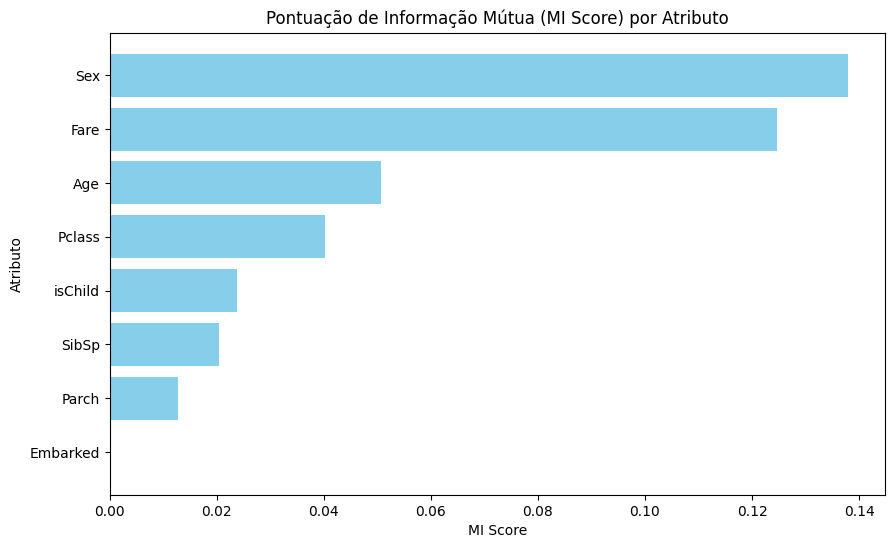

In [52]:
def plot_mi_scores(mi_scores_df):      
    plt.figure(figsize=(10, 6))
    plt.barh(mi_scores_df['Atributo'], mi_scores_df['MI Score'], color='skyblue')
    plt.xlabel('MI Score')
    plt.ylabel('Atributo')
    plt.title('Pontuação de Informação Mútua (MI Score) por Atributo')
    plt.gca().invert_yaxis()  # Inverter eixo y para ter o atributo com maior MI no topo
    plt.show()

plot_mi_scores(mi_scores_df=mi_scores_df)

#### **Importância das Features em Modelos de Árvore**

**Feature Importance** quantifica a relevância de cada variável independente (feature) para as previsões do modelo. Nos modelos de árvore, como Decision Trees, Random Forests e Gradient Boosting, a importância das features é medida com base em quanto elas melhoram a pureza dos nós (divisões).

#### **Como Funciona:**
1. **Divisões e Nós**:
   - Os dados são divididos em subconjuntos em cada nó da árvore com base em uma feature específica.
  
2. **Cálculo da Importância**:
   - A importância de uma feature é calculada pela redução da impureza (ex. Gini impurity ou Entropy) causada pelas divisões que a feature gera. Mais redução na impureza significa maior importância.

3. **Ensemble Models (Random Forests e Gradient Boosting)**:
   - A importância de uma feature é a média das importâncias dessa feature em todas as árvores do ensemble.

4. **Normalização**:
   - As importâncias das features são normalizadas para que a soma de todas seja igual a 1.

In [53]:
clf = RandomForestClassifier()
clf.fit(X=df[cols_to_predict], y=df.Survived)
rf_importances = clf.feature_importances_
forest_importances = pd.Series(rf_importances, index=cols_to_predict)

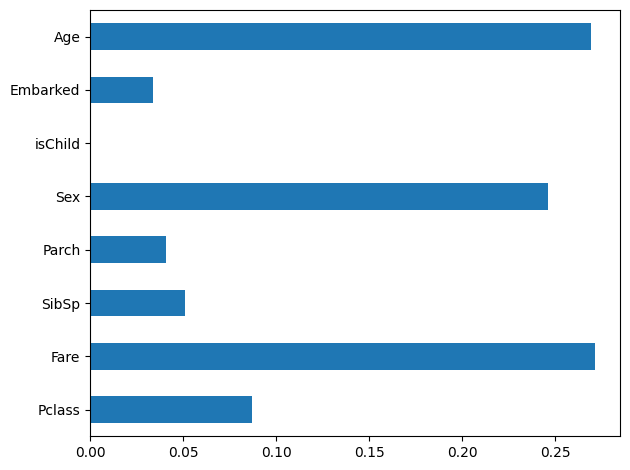

In [54]:
fig, ax = plt.subplots()
forest_importances.plot.barh(ax=ax)
fig.tight_layout()